## Loading Data

In [1]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

newsgroups_test = fetch_20newsgroups(subset='test')
pprint(list(newsgroups_test.target_names))
pprint(newsgroups_test.filenames.shape)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
(7532,)


In [2]:
categories = ['rec.sport.baseball', 'talk.politics.guns', 'misc.forsale']

newsgroups = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), 
                                categories = categories)

data = newsgroups.data
print(len(data))
data[:2]

1728


["I just wanted to let everyone know that I have lost what little respect I have\nfor Jim LeFebvre after seeing today's Cubs game. First of all how could he\nstart Maldonado over May. After the way May played at the end of last year and\nthe way he tore up the Cactus League how could you let him sit the bench? Not\nto mention that a right hander (Maddux) started. I really blew my top when\nLefebvre pinch hit for Rick Wilkins with TOMMY SHIELDS! How can you do that\njust because of the lefty-righty thing, too much is made of that. Wilkins is\ntwice the hitter that Shields is. Then the next batter was Jose Vizcaino, one\nof the weakest hitters I have ever seen, and who had looked terrible at bat all\nday, and Lefebre let him hit, while May still sat the bench. I think even Arnie\nHarris was stunned by this because he showed May sitting in the dugout while\nVizcaino was batting. Face it Lefebvre has got to be the worst manager in\nbaseball.\n\t\t\t\t\t\tA dishard Cub fan\n",
 'I am lookin

## Pre-processing

In [3]:
import gensim, spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk

In [4]:
data_words = list(map(gensim.utils.simple_preprocess, data))

In [5]:
data_words[:1]

[['just',
  'wanted',
  'to',
  'let',
  'everyone',
  'know',
  'that',
  'have',
  'lost',
  'what',
  'little',
  'respect',
  'have',
  'for',
  'jim',
  'lefebvre',
  'after',
  'seeing',
  'today',
  'cubs',
  'game',
  'first',
  'of',
  'all',
  'how',
  'could',
  'he',
  'start',
  'maldonado',
  'over',
  'may',
  'after',
  'the',
  'way',
  'may',
  'played',
  'at',
  'the',
  'end',
  'of',
  'last',
  'year',
  'and',
  'the',
  'way',
  'he',
  'tore',
  'up',
  'the',
  'cactus',
  'league',
  'how',
  'could',
  'you',
  'let',
  'him',
  'sit',
  'the',
  'bench',
  'not',
  'to',
  'mention',
  'that',
  'right',
  'hander',
  'maddux',
  'started',
  'really',
  'blew',
  'my',
  'top',
  'when',
  'lefebvre',
  'pinch',
  'hit',
  'for',
  'rick',
  'wilkins',
  'with',
  'tommy',
  'shields',
  'how',
  'can',
  'you',
  'do',
  'that',
  'just',
  'because',
  'of',
  'the',
  'lefty',
  'righty',
  'thing',
  'too',
  'much',
  'is',
  'made',
  'of',
  'that'

In [6]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['com', 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

data_words = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_words]

data_ready = []
# Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
for sent in data_words:
    # Parse the sentence using the loaded 'en' model object `nlp`. Extract the lemma for each token and join
    doc = nlp(" ".join(sent)) 
    data_ready.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
# remove stopwords once more after lemmatization
data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_ready]    

In [7]:
data_ready[:1]

[['let',
  'everyone',
  'lose',
  'little',
  'respect',
  'jim',
  'lefebvre',
  'today',
  'cub',
  'game',
  'first',
  'start',
  'maldonado',
  'way',
  'play',
  'end',
  'last',
  'year',
  'way',
  'tear',
  'cactus',
  'league',
  'let',
  'sit',
  'bench',
  'mention',
  'hander',
  'maddux',
  'start',
  'really',
  'blow',
  'top',
  'lefebvre',
  'pinch',
  'hit',
  'rick',
  'wilkin',
  'tommy',
  'shield',
  'lefty',
  'righty',
  'thing',
  'much',
  'wilkin',
  'twice',
  'hitter',
  'shield',
  'batter',
  'jose',
  'vizcaino',
  'weak',
  'hitter',
  'ever',
  'look',
  'terrible',
  'bat',
  'day',
  'lefebre',
  'let',
  'hit',
  'still',
  'sit',
  'bench',
  'arnie',
  'harris',
  'stunned',
  'show',
  'sit',
  'vizcaino',
  'batting',
  'face',
  'lefebvre',
  'bad',
  'manager',
  'baseball',
  'dishard',
  'cub',
  'fan']]

## Lemmatization from different libaraies

In [8]:
'''Spacy'''
import spacy

sentence = "is am were was"
nlp = spacy.load('en', disable=['parser', 'ner'])
doc = nlp(sentence)

# Extract the lemma for each token and join
print("="*10, "Lemmatization from spacy", "="*10)
print(" ".join([token.lemma_ for token in doc]))

'''Gensim'''
'''should download a pattern libarary first.'''
from gensim.utils import lemmatize
lemmatized_out = [wd.decode('utf-8').split('/')[0] for wd in lemmatize(sentence)]
print("="*10, "Lemmatization from spacy", "="*10)
print(lemmatized_out)

========== Lemmatization from spacy ==========
be be be be
========== Lemmatization from spacy ==========
['be', 'be', 'be', 'be']


## Feature Extraction

In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

## Topic Modelling (LDA)

In [10]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.013*"offer" + 0.013*"sale" + 0.012*"price" + 0.012*"include" + '
  '0.010*"sell" + 0.009*"drive" + 0.008*"new" + 0.008*"card" + 0.007*"ask" + '
  '0.007*"work"'),
 (1,
  '0.016*"year" + 0.013*"game" + 0.010*"last" + 0.009*"team" + 0.009*"player" '
  '+ 0.008*"play" + 0.007*"baseball" + 0.007*"win" + 0.006*"home" + '
  '0.006*"hit"'),
 (2,
  '0.014*"gun" + 0.008*"time" + 0.008*"people" + 0.007*"state" + 0.006*"bill" '
  '+ 0.005*"weapon" + 0.005*"law" + 0.004*"thing" + 0.004*"case" + '
  '0.004*"well"'),
 (3,
  '0.029*"lens" + 0.023*"weaver" + 0.013*"camera" + 0.011*"file" + '
  '0.007*"ticket" + 0.007*"ca" + 0.006*"mar" + 0.006*"picture" + '
  '0.005*"exposure" + 0.005*"film"')]


## Topic Modeling (tf-idf and NMF)

In [11]:
# from gensim.models import TfidfModel
# tfidf = TfidfModel(corpus)

# model = TfidfModel(corpus)  # fit model
# tfidf = [model[corpus[i]] for i in range(len(corpus))]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None)  

tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

from sklearn.decomposition import NMF
no_topics = 4

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([id2word[feature_names[i][0]]
            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(nmf, tfidf_feature_names, n_top_words=10)

Topic #0: year time well much last way anyone thing really people
Topic #1: sale shipping offer sell include condition new interested mail manual
Topic #2: game bat first late cleveland win york anyone brave mize
Topic #3: email reply interested address look ship offer call cheap title



## Visualization

In [12]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
display(vis)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      48.471115        1       1 -0.146558 -0.219932
1      24.195049        1       2 -0.168363  0.169469
0      19.208178        1       3  0.253333 -0.035508
3       8.125655        1       4  0.061588  0.085970, topic_info=      Category        Freq         Term       Total  loglift  logprob
term                                                                 
1265   Default  271.000000         lens  271.000000  30.0000  30.0000
408    Default  788.000000          gun  788.000000  29.0000  29.0000
62     Default  588.000000         year  588.000000  28.0000  28.0000
1182   Default  211.000000       weaver  211.000000  27.0000  27.0000
82     Default  292.000000        offer  292.000000  26.0000  26.0000
219    Default  275.000000         sale  275.000000  25.0000  25.0000
607    Default  264.000000        price  264.000000  24.0000  24.0000
185    Default  264.000000      include  264.000000  23.0000  23.0000
18     Default  388.000000         game  388.000000  22.0000  22.0000
25     Default  277.000000         last  277.000000  21.0000  21.0000
85     Default  218.000000         sell  218.000000  20.0000  20.0000
381    Default  250.000000         team  250.000000  19.0000  19.0000
987    Default  246.000000       player  246.000000  18.0000  18.0000
101    Default  196.000000        drive  196.000000  17.0000  17.0000
40     Default  217.000000         play  217.000000  16.0000  16.0000
366    Default  430.000000       people  430.000000  15.0000  15.0000
1252   Default  118.000000       camera  118.000000  14.0000  14.0000
162    Default  165.000000         card  165.000000  13.0000  13.0000
2      Default  191.000000     baseball  191.000000  12.0000  12.0000
3210   Default  104.000000         file  104.000000  11.0000  11.0000
386    Default  186.000000          win  186.000000  10.0000  10.0000
134    Default  186.000000          ask  186.000000   9.0000   9.0000
866    Default  365.000000        state  365.000000   8.0000   8.0000
71     Default  147.000000    condition  147.000000   7.0000   7.0000
107    Default  172.000000         home  172.000000   6.0000   6.0000
114    Default  146.000000       manual  146.000000   5.0000   5.0000
81     Default  312.000000          new  312.000000   4.0000   4.0000
79     Default  141.000000   interested  141.000000   3.0000   3.0000
21     Default  163.000000          hit  163.000000   2.0000   2.0000
296    Default  136.000000         mail  136.000000   1.0000   1.0000
...        ...         ...          ...         ...      ...      ...
6043    Topic4   26.905640         code   27.784649   2.4780  -5.8413
6877    Topic4   26.520977          oct   27.393923   2.4778  -5.8557
6825    Topic4   54.789967          mar   56.676750   2.4763  -5.1301
5119    Topic4   24.509872  application   25.477808   2.4714  -5.9346
8250    Topic4   24.368017         trek   25.351923   2.4706  -5.9404
2910    Topic4   19.781673   university   20.671682   2.4661  -6.1489
778     Topic4   27.565300           co   28.904995   2.4627  -5.8171
1009    Topic4   20.867762       wilson   21.908144   2.4615  -6.0954
2400    Topic4   16.171638         mile   16.992584   2.4606  -6.3504
918     Topic4   15.959765       summer   16.791031   2.4594  -6.3636
4256    Topic4   20.588348       expire   21.743593   2.4556  -6.1089
1402    Topic4   16.172434      product   17.109339   2.4538  -6.3503
3127    Topic4   15.301988       carpet   16.189642   2.4538  -6.4057
6246    Topic4   22.038998      eastern   23.365034   2.4517  -6.0408
1413    Topic4   13.475865       miller   14.313467   2.4498  -6.5327
1267    Topic4   15.705469      mailing   16.707088   2.4483  -6.3796
5026    Topic4   22.080912  participate   23.535606   2.4463  -6.0389
2625    Topic4   24.492311     directly   26.158579   2.4443  -5.9353
1566    Topic4   24.800900          nov   26.666683   2.4376  -

## Wordcloud

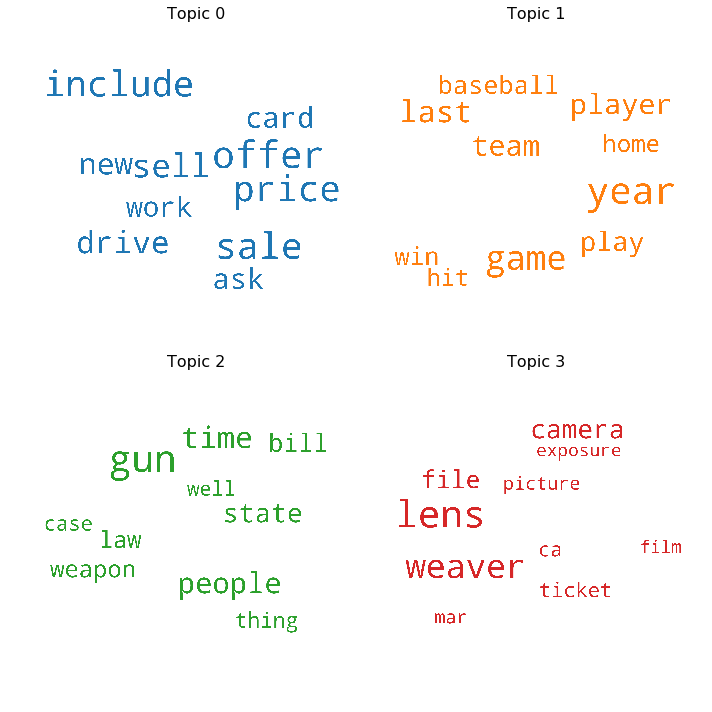

In [14]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()